# Peter at ang Lobo: Primer sa Reinforcement Learning

Sa tutorial na ito, matututuhan natin kung paano gamitin ang Reinforcement Learning sa isang problema ng paghahanap ng daan. Ang setting ay inspirasyon mula sa [Peter and the Wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), isang musikal na kuwentong-pambata ng Russian composer na si [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Ito ay kuwento tungkol sa batang si Peter, na matapang na lumabas ng kanyang bahay papunta sa isang clearing sa kagubatan upang habulin ang isang lobo. Magtuturo tayo ng mga algorithm sa machine learning na tutulong kay Peter na tuklasin ang paligid at bumuo ng isang optimal na mapa ng pag-navigate.

Una, mag-import tayo ng ilang kapaki-pakinabang na mga library:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Pangkalahatang-ideya ng Reinforcement Learning

Ang **Reinforcement Learning** (RL) ay isang teknik sa pagkatuto na nagbibigay-daan sa atin na matutunan ang pinakamainam na kilos ng isang **agent** sa isang **kapaligiran** sa pamamagitan ng pagsasagawa ng maraming eksperimento. Ang isang agent sa kapaligirang ito ay dapat mayroong isang **layunin**, na tinutukoy ng isang **reward function**.

## Ang Kapaligiran

Para sa kasimplehan, isipin natin na ang mundo ni Peter ay isang parisukat na board na may sukat na `width` x `height`. Ang bawat cell sa board na ito ay maaaring:
* **lupa**, kung saan maaaring maglakad si Peter at ang iba pang nilalang
* **tubig**, kung saan malinaw na hindi ka maaaring maglakad
* **isang puno** o **damo** - isang lugar kung saan maaari kang magpahinga
* **isang mansanas**, na kumakatawan sa isang bagay na ikatutuwa ni Peter na makita upang mapakain ang sarili
* **isang lobo**, na mapanganib at dapat iwasan

Upang makipag-ugnayan sa kapaligiran, magtatakda tayo ng isang klase na tinatawag na `Board`. Upang hindi masyadong magulo ang notebook na ito, inilipat namin ang lahat ng code na may kinalaman sa board sa isang hiwalay na module na tinatawag na `rlboard`, na ating i-import ngayon. Maaari mong tingnan ang loob ng module na ito upang makakuha ng higit pang detalye tungkol sa mga internal na aspeto ng implementasyon.


Ngayon, gumawa tayo ng isang random na board at tingnan kung paano ito lumalabas:


In [4]:
# code block 1

## Mga Aksyon at Patakaran

Sa ating halimbawa, ang layunin ni Peter ay makahanap ng mansanas, habang iniiwasan ang lobo at iba pang mga hadlang. Tukuyin ang mga aksyon bilang isang diksyunaryo, at iugnay ang mga ito sa mga pares ng kaukulang pagbabago sa koordinasyon.


In [5]:
# code block 2

Ang estratehiya ng ating ahente (Peter) ay tinutukoy ng tinatawag na **patakaran**. Tingnan natin ang pinakasimpleng patakaran na tinatawag na **random walk**.

## Random walk

Unahin nating lutasin ang ating problema sa pamamagitan ng pagpapatupad ng estratehiyang random walk.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Gantimpalang Function

Upang gawing mas matalino ang ating polisiya, kailangan nating maunawaan kung alin sa mga galaw ang "mas mabuti" kaysa sa iba.


In [8]:
#code block 5

## Q-Learning

Gumawa ng Q-Table, o multi-dimensional na array. Dahil ang ating board ay may sukat na `width` x `height`, maaari nating i-representa ang Q-Table gamit ang isang numpy array na may hugis na `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Ilagay ang Q-Table sa `plot` na function upang maipakita ang talahanayan sa board:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Ang Diwa ng Q-Learning: Bellman Equation at Learning Algorithm

Sumulat ng pseudo-code para sa ating learning algorithm:

* I-initialize ang Q-Table Q na may pantay na halaga para sa lahat ng estado at aksyon
* Itakda ang learning rate $\alpha\leftarrow 1$
* Ulitin ang simulation nang maraming beses
   1. Magsimula sa random na posisyon
   1. Ulitin
        1. Pumili ng aksyon $a$ sa estado $s$
        2. Isagawa ang aksyon sa pamamagitan ng paglipat sa bagong estado $s'$
        3. Kung makatagpo ng kondisyon na end-of-game, o masyadong maliit ang kabuuang reward - lumabas sa simulation  
        4. Kalkulahin ang reward $r$ sa bagong estado
        5. I-update ang Q-Function ayon sa Bellman equation: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. I-update ang kabuuang reward at bawasan ang $\alpha$.

## Exploit vs. Explore

Ang pinakamainam na paraan ay ang balansehin ang exploration at exploitation. Habang mas natututo tayo tungkol sa ating kapaligiran, mas malamang na sundan natin ang optimal na ruta, ngunit paminsan-minsan ay pumili ng hindi pa nasusubukang landas.

## Python Implementation

Ngayon handa na tayong i-implement ang learning algorithm. Bago iyon, kailangan din natin ng ilang function na magko-convert ng arbitraryong numero sa Q-Table sa isang vector ng probabilities para sa mga kaukulang aksyon:


In [10]:
# code block 7

Nagdadagdag kami ng maliit na halaga ng `eps` sa orihinal na vector upang maiwasan ang paghahati sa 0 sa unang kaso, kung saan lahat ng bahagi ng vector ay magkapareho.

Ang aktwal na algorithm ng pag-aaral na tatakbo namin para sa 5000 na eksperimento, na tinatawag ding **epochs**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Pagkatapos isagawa ang algoritmong ito, ang Q-Table ay dapat ma-update ng mga halaga na naglalarawan sa kaakit-akit ng iba't ibang aksyon sa bawat hakbang. Ipakita ang talahanayan dito:


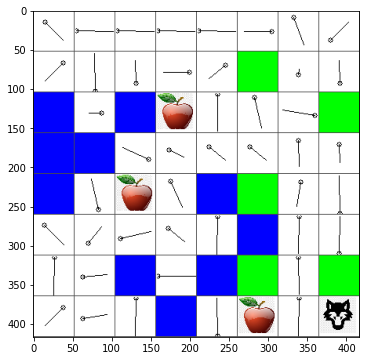

In [43]:
m.plot(Q)

## Pag-check ng Patakaran

Dahil inililista ng Q-Table ang "kaakit-akit" ng bawat aksyon sa bawat estado, madali itong gamitin upang tukuyin ang epektibong pag-navigate sa ating mundo. Sa pinakasimpleng kaso, maaari lang nating piliin ang aksyon na tumutugma sa pinakamataas na halaga ng Q-Table:


In [13]:
# code block 9

2

Kung susubukan mo ang code sa itaas nang ilang beses, mapapansin mo na minsan ito ay parang "tumitigil" lang, at kailangan mong pindutin ang STOP button sa notebook upang ihinto ito.

> **Gawain 1:** Baguhin ang `walk` function upang limitahan ang maximum na haba ng path sa isang tiyak na bilang ng hakbang (halimbawa, 100), at obserbahan ang code sa itaas na ibalik ang halagang ito paminsan-minsan.

> **Gawain 2:** Baguhin ang `walk` function upang hindi ito bumalik sa mga lugar na napuntahan na nito dati. Maiiwasan nito ang `walk` na mag-loop, gayunpaman, maaaring ma-"trap" pa rin ang agent sa isang lokasyon kung saan hindi na ito makakaalis.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


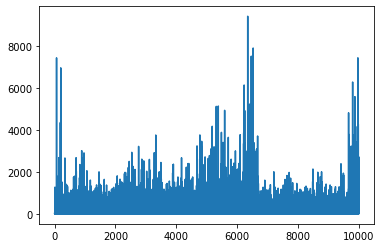

In [57]:
plt.plot(lpath)

## Ehersisyo
## Isang mas makatotohanang mundo ni Peter at ang Lobo



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa orihinal nitong wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na maaaring magmula sa paggamit ng pagsasaling ito.
